<h3 style="color:green">15 June 2020<h3> 

<center style="font-size: 2.7rem;
    font-weight: 600;"> Project Title : Covid 19 Lockdown India Twitter Data Sentiment Analysis </center>

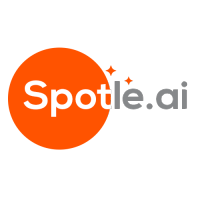

### Authors Name
 1. <a href="https://www.linkedin.com/in/dilipkumar15/" style="text-decoration: none;"  target="_blank">Dilip Kumar</a>
 2. <a href="https://www.linkedin.com/in/komal-mehta11/" style="text-decoration: none;"  target="_blank">Komal Mehta</a>
 3. <a href="https://www.linkedin.com/in/stuti-chauhan-a79b96184/" style="text-decoration: none;"  target="_blank">Stuti Chauhan</a>
 4. <a href="https://www.linkedin.com/in/somasekhar-eruvuri-775566119/" style="text-decoration: none;"  target="_blank">Eruvuri Somasekhar</a>

### Task 


- [x] <span style="color:green">A tag cloud depicting what topics / Word were being tl=alked about on Twitter. </span>
- [x] <span style="color:green">Which hashtag trended (HashTags are words or pharases beginning with # eg #COVID).</span>
- [x] <span style="color:green">Which Twitter Handler dominated conversation on Twitter.</span>
    

### Types of Visualisation Used
   - Bar plots
   - Pie Chart
   - Scatter Plots
   - Word Cloud
   - Curves 

# Project Work

# 1. Preprocessing and Cleaning of data

#### 1.1 Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')


#### 1.2 Loading Data

In [2]:
df= pd.read_csv('hashtag_data.csv',parse_dates= ['date'],encoding='utf-8-sig')
totallen=len(df)
print("Initial total length of the dataset : ",totallen)
df.head()

Initial total length of the dataset :  124384


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1262787913311387649,1262787913311387649,1589907074000,2020-05-19,16:51:14,UTC,1250079805980045318,dramaflick,The Drama Flick,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1250079805980045318', 'username'...",NaN,NaN,NaN,NaN
1,1262787786152620040,1262787786152620040,1589907044000,2020-05-19,16:50:44,UTC,807843238648299520,knowpuneet,TravelTrainee,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '807843238648299520', 'username':...",NaN,NaN,NaN,NaN
2,1262787219498000384,1262787219498000384,1589906909000,2020-05-19,16:48:29,UTC,1085426639570235392,narasinhpurohit,Narasinh Purohit,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1085426639570235392', 'username'...",NaN,NaN,NaN,NaN
3,1262786998592434176,1262786998592434176,1589906856000,2020-05-19,16:47:36,UTC,1104213868467806208,ka_trolls,Humans Of Hindutva,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1104213868467806208', 'username'...",NaN,NaN,NaN,NaN
4,1262786970163441669,1262786970163441669,1589906849000,2020-05-19,16:47:29,UTC,392180204,rajendrabohora,rajendrabohora,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '392180204', 'username': 'rajendr...",NaN,NaN,NaN,NaN


#### 1.3 Drop unnecessary Columns from the Data

In [3]:
#columns to drops
to_drop=['conversation_id','timezone','name','place','mentions','urls','photos',
         'cashtags','link','retweet','quote_url','video','near','geo','source',
         'user_rt_id','user_rt','retweet_id','reply_to','retweet_date','translate','trans_src',
         'trans_dest']

print("Columns To drop : ",to_drop)
#drop columns
df.drop(to_drop, inplace=True, axis=1)
print("No. of columns Dropped",len(to_drop))

Columns To drop :  ['conversation_id', 'timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src', 'trans_dest']
No. of columns Dropped 23


#### 1.4 Drop Empty (NA) Records

In [4]:
#droping na records
df = df.dropna()
df = df.reset_index(drop=True)
print("No. of NA records removed: ",totallen-len(df) )

No. of NA records removed:  0


#### 1.5 Drop Records older than specified Date (22-3-2020)

In [5]:
#drop old tweets older than 3-22-2020
df.drop(df[df['date'] < pd.to_datetime("22-3-2020")].index , inplace=True)
df = df.reset_index(drop=True)
print("No. of Older records removed: ",totallen-len(df) )

No. of Older records removed:  7445


#### 1.6 Drop Duplicate Record's

In [6]:
#droping dulplicates records
df = df.drop_duplicates()
#reset index after dropping
df = df.reset_index(drop=True)
print("duplicates records removed: ",totallen-len(df) )

duplicates records removed:  8374


#### 1.7 Convert all text data into SmallCase

In [7]:
#convert text to small case
df['tweet'] = df['tweet'].str.lower()
print("Converted to small case")

Converted to small case


#### 1.8 Remove Numbers 

In [8]:
#removes numbers from text
df['tweet'] = df['tweet'].str.replace('\d+', '')
print("Numbers are removed from text")

Numbers are removed from text


#### 1.9 Remove Single Character

In [9]:
#remove single character chracter
df['tweet'] = df['tweet'].replace(re.compile(r"(^| ).( |$)"), "")
print("Single character words are Removed")

Single character words are Removed


#### 1.10 Remove Hyperlink's

In [10]:
#removes links and urls
df['tweet'] = df['tweet'].replace(re.compile(r'((www\.[\S]+)|(https?://[\S]+))'),"")
print("HyperLinks are removed")

HyperLinks are removed


#### 1.11 Remove Punchuation & Special Character's

In [11]:
#removes puntuation
df['tweet'] = df['tweet'].str.replace('[^\w\s]',' ').str.replace('\s\s+', '')
print("Puntuations & Special characters are removed...")

Puntuations & Special characters are removed...


#### 1.12 Remove Stop Words

In [12]:
#stops words
stop = stopwords.words('english')

#remove stop words
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
print("Stop words are removed...")

Stop words are removed...


#### 1.13 Remove Non-English Words

In [13]:
#english words
english_word = set(nltk.corpus.words.words())

#remove non english words
df['tweet'] = df['tweet'].apply(lambda x: ' '.join([word for word in x.split() if word in (english_word)]))
print("Non english words are removed")

Non english words are removed


#### 1.14 Remove extra spaces

In [14]:
df['tweet']=df['tweet'].str.strip()
df['tweet'] = df['tweet'].replace(re.compile(r"(^| ).( |$)"), " ")

#### 1.15 Remove records having word length less than 3 

In [15]:
#drops tweets less than 3 words
df.drop(df[df['tweet'].str.count(" ") < 3].index , inplace=True)
#reset index after dropping
df = df.reset_index(drop=True)
print("tweets having words less than 3 words are removed...")
print("word count less than 3 records removed: ",totallen-len(df) )

tweets having words less than 3 words are removed...
word count less than 3 records removed:  48353


#### 1.16 Tokenize Text

In [16]:
tokenized_tweet = df.tweet.apply(lambda x: x.split())
tokenized_tweet.head()

0    [drama, flick, comes, keep, high, keep, hit, s...
1                            [naam, hi, sab, unlocked]
2    [corona, virus, overcome, stress, make, pic, t...
3                  [fight, best, doctor, degree, good]
4    [bring, attention, stop, audit, happening, man...
Name: tweet, dtype: object

#### 1.17 Stemming

In [17]:

from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [drama, flick, come, keep, high, keep, hit, su...
1                              [naam, hi, sab, unlock]
2    [corona, viru, overcom, stress, make, pic, twi...
3                   [fight, best, doctor, degre, good]
4    [bring, attent, stop, audit, happen, mani, rem...
Name: tweet, dtype: object

#### 1.18 Visualise the most frequent Words in dataset

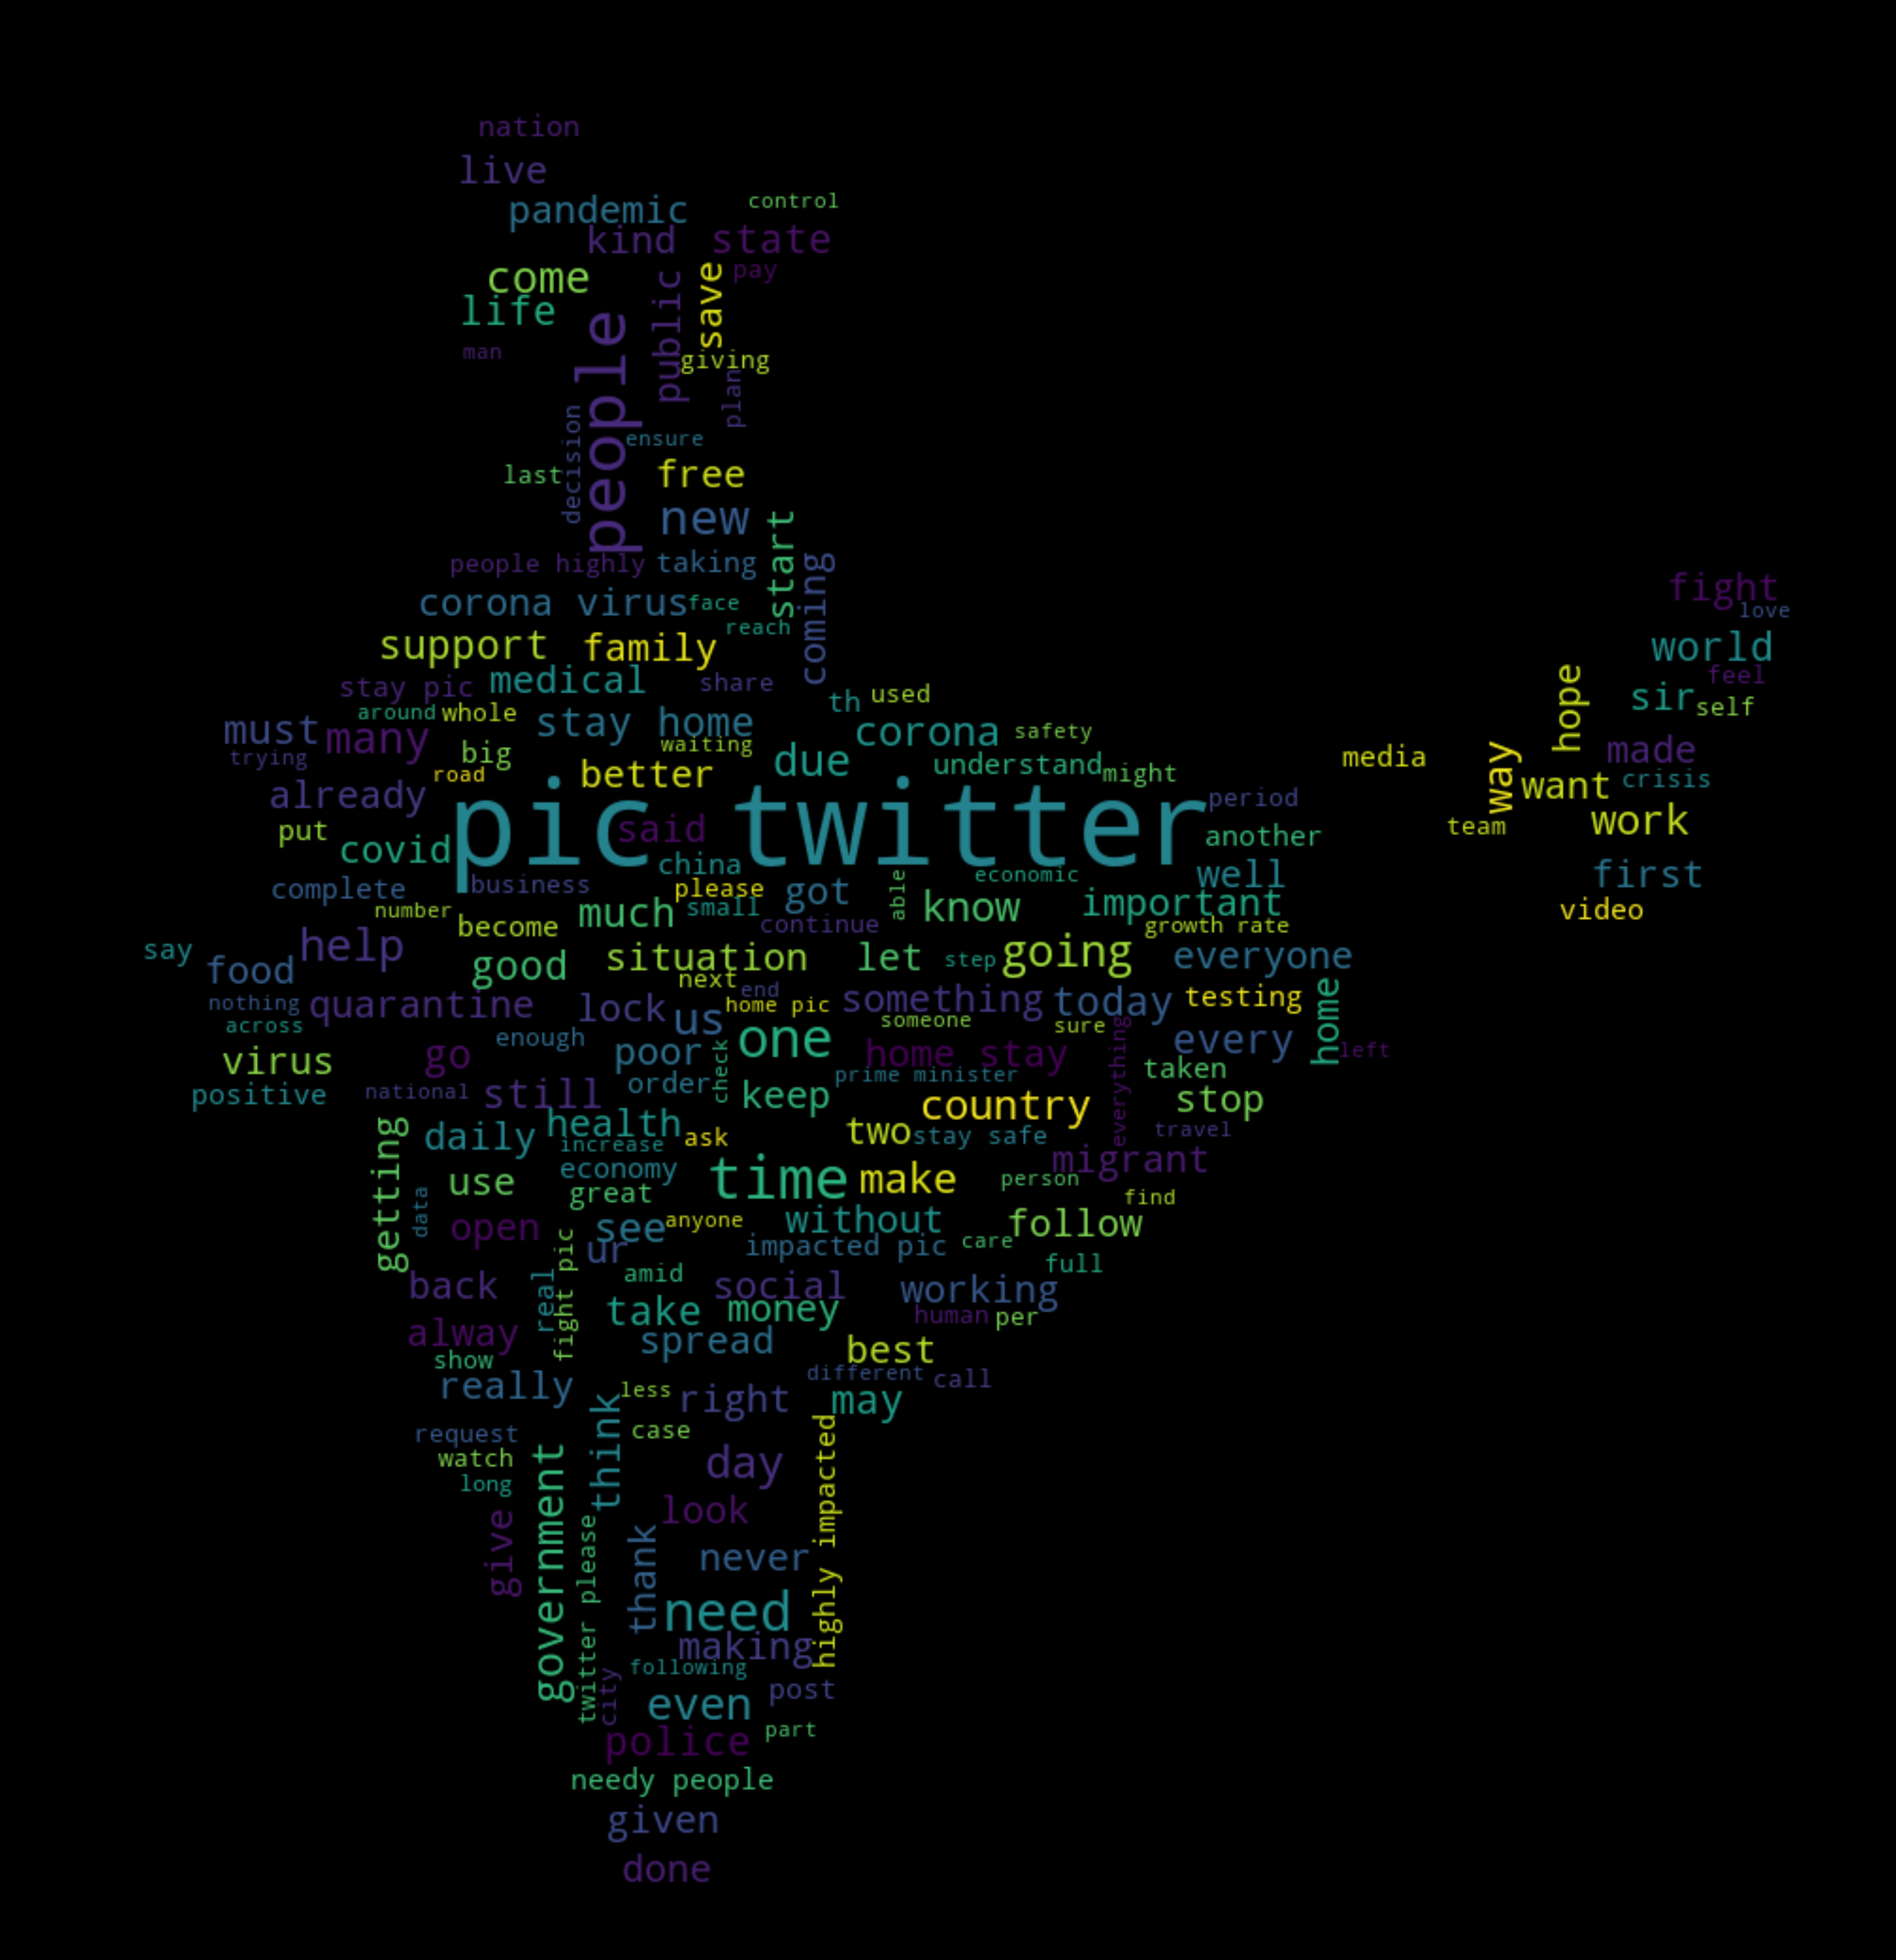

In [18]:
from PIL import Image
all_words = ' '.join([text for text in df['tweet']]) 
from wordcloud import WordCloud

mask = np.array(Image.open('in.png'))


#Run the following to generate your wordcloud
def PlotWordCloud(words, title):
    wordcloud = WordCloud(width = 2000, height = 2000, background_color="black" ,mask=mask
                ).generate(words)                       
    # plot the WordCloud image                        
    plt.figure(figsize = (40, 40),facecolor='k') 
    plt.imshow(wordcloud,interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=100)
    plt.show() 
PlotWordCloud(all_words, 'Trending Topics in Tweets')

#### 1.19 Save Clean Data

In [19]:
#write clean data to new file
df.to_csv('preprocessed_data.csv', index=False, encoding="utf-8")
print("clean data is saved on preprocessed_data.csv")

clean data is saved on preprocessed_data.csv


# 2. Generating labelled data


In [20]:
import pandas as pd
import numpy as np
import csv
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
df = pd.read_csv('preprocessed_data.csv')
#reset index after dropping
df = df.reset_index(drop=True)
#function to assign polarity of sentiment -1, 0 and 1
def polararity_gen(row):
    text = row['tweet']
    score=analyser.polarity_scores(text)['compound']
    pl = 0
    if score > 0.05:
        pl= 1
    elif score <= 0.0 and text.count(" ") > 3:#-0.05:
        pl= -1
    elif score >= 0 and score <= 0.05 :
        pl= 0   
    return pl

df['p_score']=df.apply(polararity_gen,axis=1)

total=df['p_score'].count()
p=df[df['p_score']== 1].count()
nt=df[df['p_score']== 0].count()
n=df[df['p_score']== -1].count()
print(df.head())
print("Positive Sentiment : {:0.2f}%".format((p['p_score']/total)*100))
print("Neutral Sentiment : {:0.2f}%".format((nt['p_score']/total)*100))
print("Negative Sentiment : {:0.2f}%".format((n['p_score']/total)*100))
df.to_csv('sentiment.csv', index=False, encoding="utf-8")
print("Data Saved in sentiment.csv file")

                    id     created_at        date      time  \
0  1262787913311387649  1589907074000  2020-05-19  16:51:14   
1  1262787786152620040  1589907044000  2020-05-19  16:50:44   
2  1262787219498000384  1589906909000  2020-05-19  16:48:29   
3  1262786970163441669  1589906849000  2020-05-19  16:47:29   
4  1262786603023400965  1589906762000  2020-05-19  16:46:02   

               user_id         username  \
0  1250079805980045318       dramaflick   
1   807843238648299520       knowpuneet   
2  1085426639570235392  narasinhpurohit   
3            392180204   rajendrabohora   
4           4848217685  tanwar_ranvijay   

                                               tweet  replies_count  \
0     drama flick comes keep high keep hit subscribe              0   
1                               naam hi sab unlocked              0   
2      corona virus overcome stress make pic twitter              0   
3                      fight best doctor degree good              1   
4  brin

# 3. Training Model and Prediction of Sentiments of Tweets using Logistic Regression


Loading library

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Columns in the original dataset:



Index(['id', 'created_at', 'date', 'time', 'user_id', 'username', 'tweet',
       'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'p_score'],
      dtype='object')

### 3.1. Load Data

In [ ]:
#Loading data
df = pd.read_csv('sentiment.csv')
print("Columns in the original dataset:\n")
df.columns

### 3.2. Loading Model

In [22]:
from sklearn.linear_model import LogisticRegression

X = df['tweet']
y = df['p_score']
one_hot_encoded_label = pd.get_dummies(y)
print(one_hot_encoded_label.head())

   -1   0   1
0   1   0   0
1   0   1   0
2   1   0   0
3   0   0   1
4   1   0   0


### 3.3. Splitting data into training and testing data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print("percentage of the X_train data:{:0.2f}%".format(len(X_train)/len(df)*100))
print("percentage of the X_test data:{:0.2f}%".format(len(X_test)/len(df)*100))
print("percentage of the y_train data:{:0.2f}%".format(len(y_train)/len(df)*100))
print("percentage of the y_test data:{:0.2f}%".format(len(y_test)/len(df)*100))

percentage of the X_train data:75.00%
percentage of the X_test data:25.00%
percentage of the y_train data:75.00%
percentage of the y_test data:25.00%


### 3.4. Extracting Features

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5).fit(X_train)
print("Features Length ", len(vect.get_feature_names()))
X_train_vectorized = vect.transform(X_train)
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

X_train_vectorized = vect.transform(X_train)

Features Length  5204
Smallest tfidf:
['plentiful' 'toxin' 'tortured' 'governmental' 'signature' 'bias'
 'volatility' 'infant' 'criminally' 'sequential']

Largest tfidf: 
['effective' 'quarantine' 'fighting' 'set' 'environment' 'dumb' 'breath'
 'locked' 'train' 'national']


### 3.5. Train the Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
c_val =[0.2,0.75, 1, 2, 3, 4, 5, 10,15,20,25]

iter=0
acc_vect=[]
for i in range(3):
    acc_val=[]
    for c in c_val:
        
        X = df['tweet']
        y = df['p_score']
        one_hot_encoded_label = pd.get_dummies(y)
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
        from sklearn.feature_extraction.text import TfidfVectorizer
        vect = TfidfVectorizer(min_df=5).fit(X_train)
        X_train_vectorized = vect.transform(X_train)
        feature_names = np.array(vect.get_feature_names())
        sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()
        X_train_vectorized = vect.transform(X_train)
        
        model = LogisticRegression(C=c,solver='saga')
        model.fit(X_train_vectorized, y_train)
        #print ("Accuracy for C=%s: %s" % (c, accuracy_score(y_test, model.predict(vect.transform(X_test)))))
        acc_val.append(round(accuracy_score(y_test, model.predict(vect.transform(X_test))),2))
        
    df['p_score']=model.predict(vect.transform(df.tweet[0:]))
    print("After : ",i+1,"run ", "Accuracy : ",acc_val[-1]*100,"%")
    acc_vect.append(acc_val)
sorted_coef_index = model.coef_[0].argsort()
#after training model
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))
print("First two tweets prediction ", model.predict(vect.transform(df.tweet[0:2])))
print("Final Accuracy :{:0.2f}".format(acc_val[-1]*100))

After :  1 run  Accuracy :  86.0 %
After :  2 run  Accuracy :  94.0 %
After :  3 run  Accuracy :  97.0 %
Smallest Coefs:
['best' 'positive' 'safe' 'great' 'care' 'please' 'super' 'free' 'help'
 'kindly']

Largest Coefs: 
['crisis' 'war' 'cancer' 'poor' 'infected' 'worst' 'death' 'abuse' 'kill'
 'negative']
First two tweets prediction  [-1  0]
Final Accuracy :97.00


### 3.6. Model Accuracy plot and confusion matrix

#### 3.6.1 Accuracy vs Coercion value plot

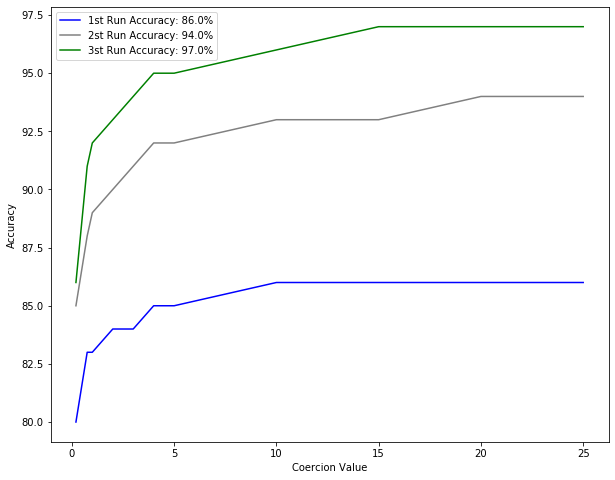

In [26]:
plt.figure(figsize=(10,8))
plt.plot(c_val, [element * 100 for element in acc_vect[0]],color="blue",label='1st Run Accuracy: '+str(acc_vect[0][-1]*100)+"%")
plt.plot(c_val, [element * 100 for element in acc_vect[1]],color="grey",label='2st Run Accuracy: '+str(acc_vect[1][-1]*100)+"%")
plt.plot(c_val, [element * 100 for element in acc_vect[2]],color="green",label='3st Run Accuracy: '+str(acc_vect[2][-1]*100)+"%")
plt.xlabel('Coercion Value')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

#### 3.6.2 Confusion Matrix

[[8807  139   76]
 [ 268 1520   20]
 [  55   26 8097]]


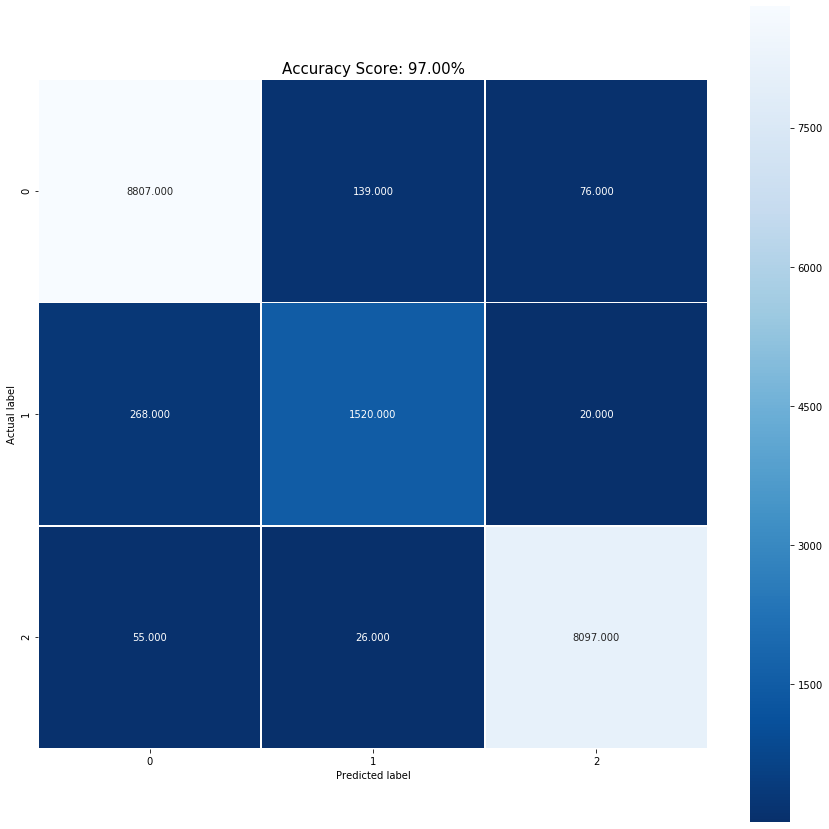

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = model.predict(vect.transform(X_test))
cm = confusion_matrix(y_test.to_numpy(), predictions)
print(cm)
plt.figure(figsize=(15,15))
ax=sns.heatmap(cm, annot=True, fmt=".3f", linewidths=1, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
ax.set_aspect("equal")
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
all_sample_title = 'Accuracy Score: {:0.2f}%'.format(acc_val[-1]*100)
plt.title(all_sample_title, size = 15);

#### 3.6.3 precision Matrix

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          -1       0.96      0.98      0.97      9022
           0       0.90      0.84      0.87      1808
           1       0.99      0.99      0.99      8178

    accuracy                           0.97     19008
   macro avg       0.95      0.94      0.94     19008
weighted avg       0.97      0.97      0.97     19008



### 3.7. Predicting and saving sentiment of all tweets using trained model

In [29]:
df['p_score']=model.predict(vect.transform(df.tweet[0:]))
print("Total Predicted tweets",len(df))

Total Predicted tweets 76031


### 3.8. Saving Sentiments

In [30]:
df.to_csv('sentiment.csv', index=False, encoding="utf-8")
print("Data Written to sentiment.csv file...")

Data Written to sentiment.csv file...


# 4. Data Analysis and Visualization

In [31]:
import pandas as pd
import numpy as np
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import datetime
import calendar


### 4.1. Sentiments statistics : 


In [32]:
df = pd.read_csv('sentiment.csv')
total=df['p_score'].count()
p=df[df['p_score']== 1 ].count()
nt=df[df['p_score']==0].count()
n=df[df['p_score']== -1 ].count()
print("positive %: ",(p['p_score']/total)*100)
print("neutral %: ",(nt['p_score']/total)*100)
print("negative %: ",(n['p_score']/total)*100)

positive %:  43.649300943036394
neutral %:  8.884533940103378
negative %:  47.466165116860225


### 4.2. Sentiments Bar Plots and Pie chart

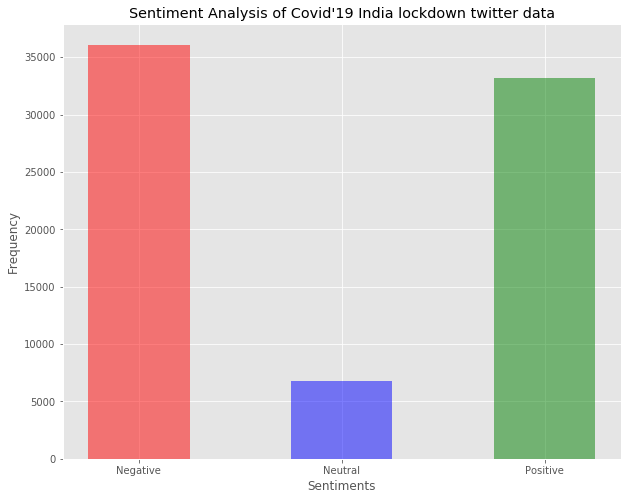

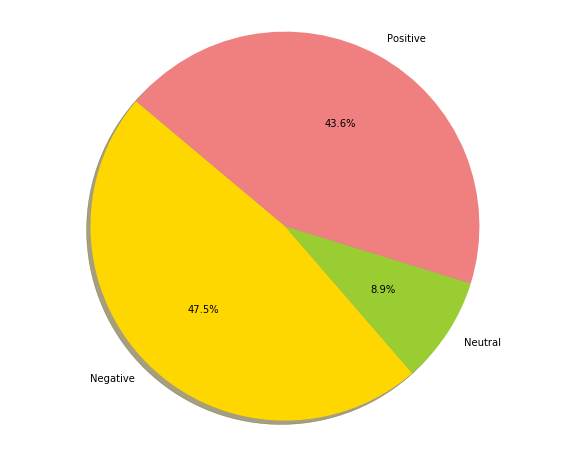

In [33]:
## plotting the data based on the count of positive , negative and neutral feedback
width = 0.50  
ind = np.arange(4) 
df2 = df.groupby(df["p_score"],as_index=False).count()
plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.bar(["Negative","Neutral","Positive"],df2["hashtags"],width,alpha=0.5 ,color = ["red","blue","green"])
plt.title("Sentiment Analysis of Covid'19 India lockdown twitter data") 
plt.ylabel("Frequency")
plt.xlabel("Sentiments")
plt.show()

#pie plot
labels = 'Negative', 'Neutral', 'Positive'
sizes = []
sizes = df2["id"].tolist()
colors = ['gold', 'yellowgreen', 'lightcoral']

# Plot
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

ax1.axis('equal')
plt.show()



### 4.3. Top 10 trending twitter handlers

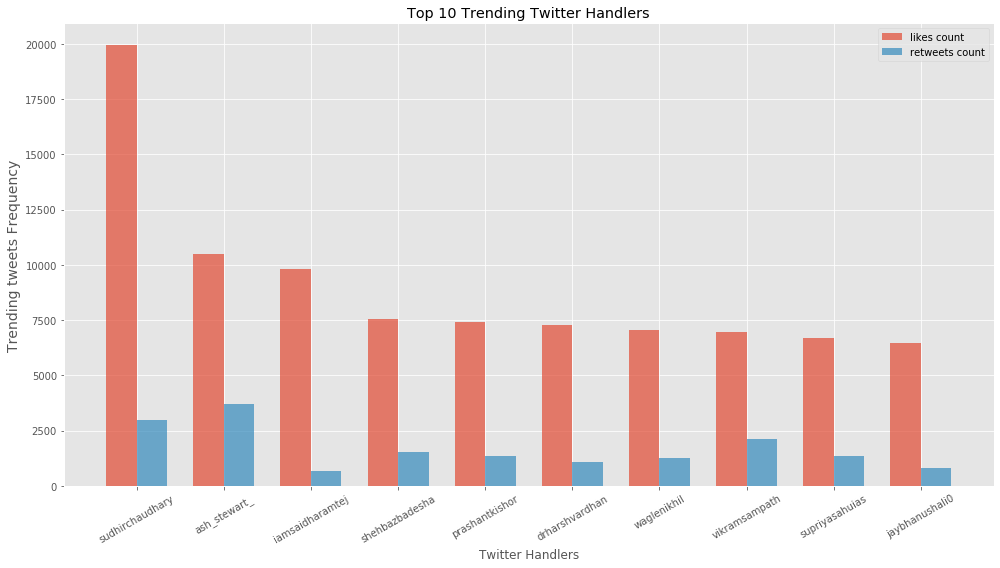

In [34]:
df = pd.read_csv('sentiment.csv')
dataframe = df[df.likes_count>0]
trending_tweets = dataframe.sort_values(by=['likes_count','retweets_count'], ascending=False).head(10)
trending_tweets

## plotting top 10 trending tweets
likes_count = []
retweets_count = []
replies_count = []
username = []
 
likes_count = trending_tweets['likes_count'].tolist()
retweets_count = trending_tweets['retweets_count'].tolist()
replies_count = trending_tweets['replies_count'].tolist()
username = trending_tweets['username'].tolist()

x = np.arange(len(username))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, likes_count, width, label='likes count',alpha=0.7 )
rects2 = ax.bar(x + width/2, retweets_count, width, label='retweets count',alpha=0.7 )

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trending tweets Frequency',fontsize=14)
ax.set_xlabel('Twitter Handlers')
ax.set_title('Top 10 Trending Twitter Handlers')
ax.set_xticks(x)
ax.set_xticklabels(username ,rotation=30,fontsize=10)
ax.legend()
fig.tight_layout()
plt.show()


### 4.4. WordCloud for Positive and Negative tweets words

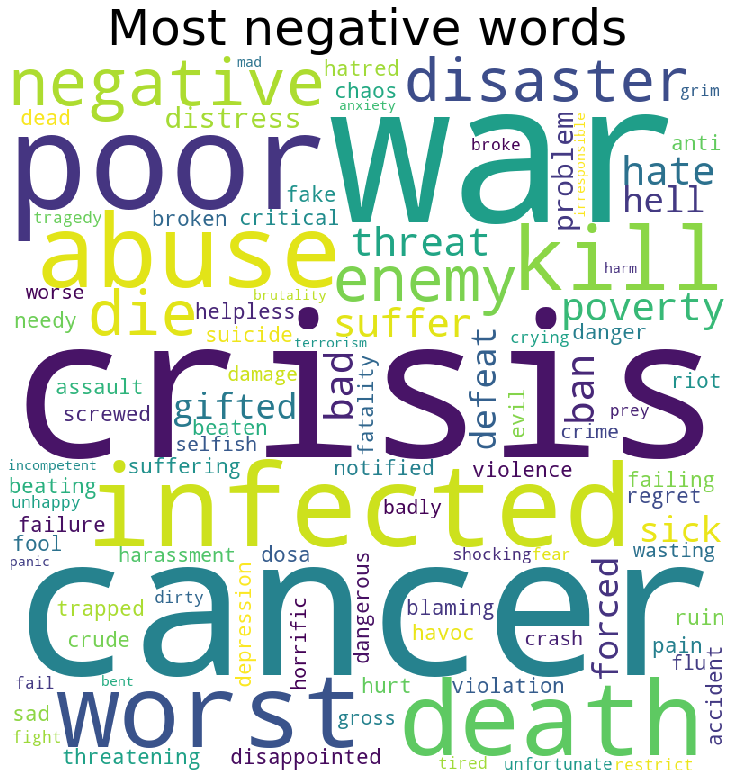

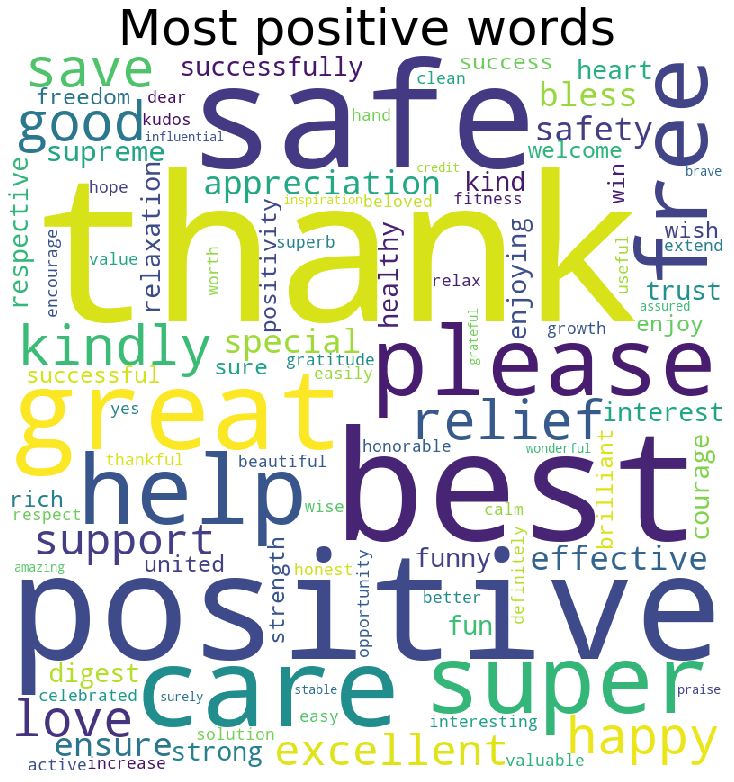

In [35]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def PlotWordCloud(words, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white' 
                ).generate(words) 
                                                           
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=50)

    plt.show() 
negative = ''
for word in feature_names[sorted_coef_index[:-101:-1]]:
    negative += word + ' '
PlotWordCloud(negative, 'Most negative words')

positive = ''
for word in feature_names[sorted_coef_index[:100]]:
    positive += word + ' '    
PlotWordCloud(positive, 'Most positive words')


### 4.5. WordCloud for positive, negative and neutral hashtags according to tweets sentiments

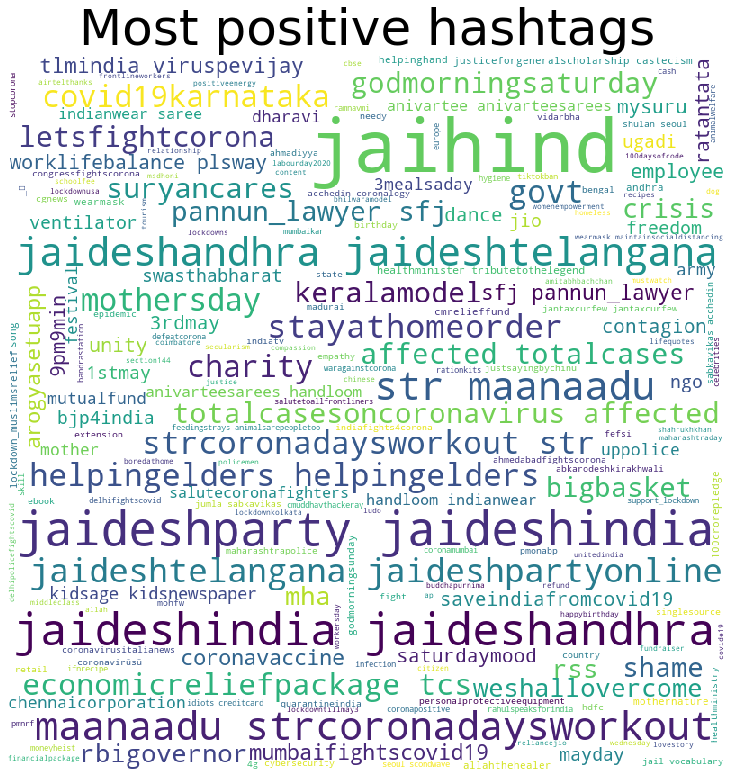

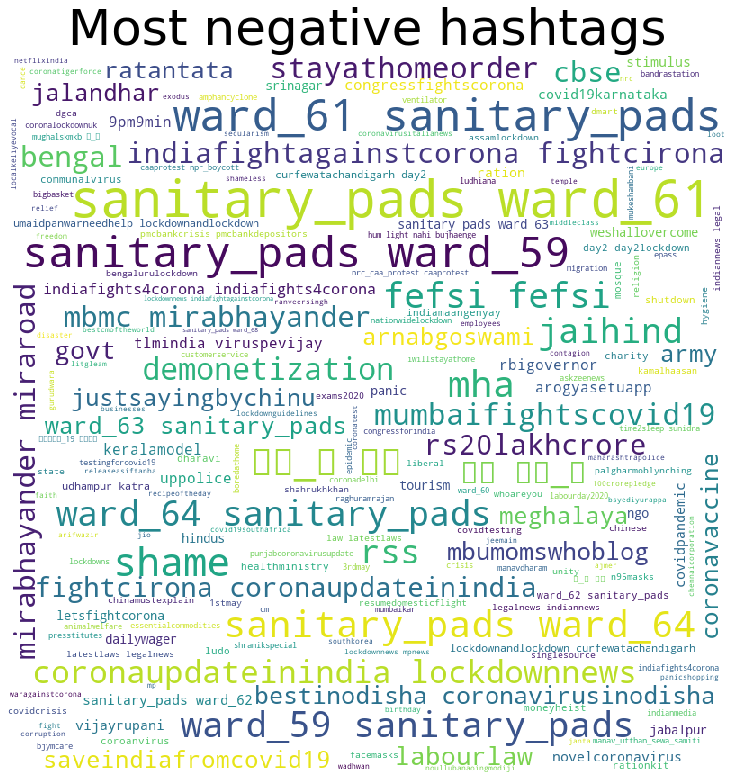

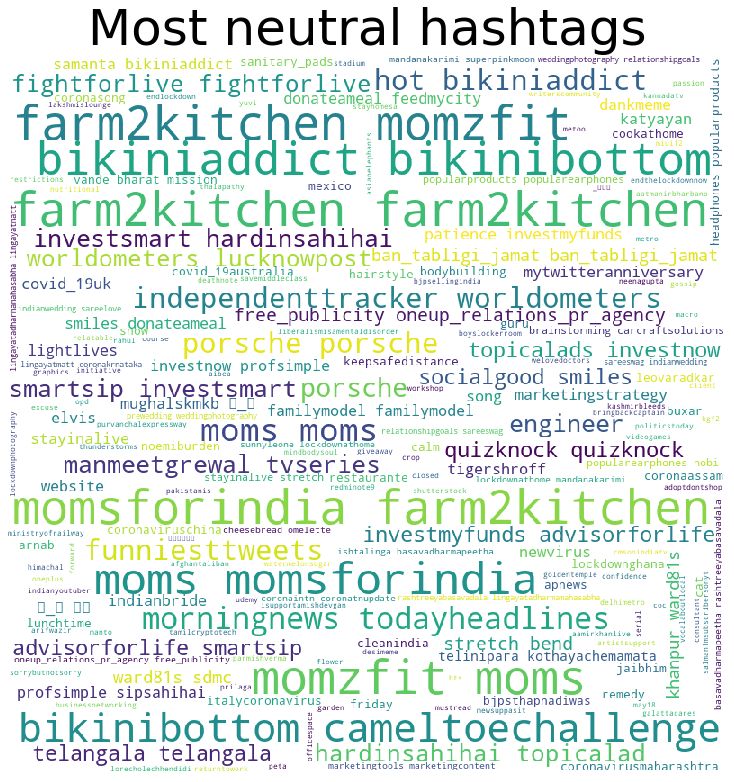

In [36]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import itertools
import collections

df= pd.read_csv('sentiment.csv')
df['hashtags'] = df['hashtags'].str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
neg_hastags=df[df['p_score']==-1]
pos_hastags=df[df['p_score']==1]
nt_hastags=df[df['p_score']==0]
from wordcloud import WordCloud


pos=""
neg=""
nt=""
for i in pos_hastags.hashtags:
    pos+=i+" "
for i in neg_hastags.hashtags:
    neg+=i+" "
for i in nt_hastags.hashtags:
    nt+=i+" "
#print(s)

psplit=pos.split()
nsplit=neg.split()
ntsplit=nt.split()
common=set(psplit) & set(nsplit) & set(ntsplit)

phashtag  = [word for word in psplit if word not in common]
phashtag = ' '.join(phashtag)
nhashtag  = [word for word in nsplit if word not in common]
nhashtag = ' '.join(nhashtag)
nthashtag  = [word for word in ntsplit if word not in common]
nthashtag = ' '.join(nthashtag)
# lower max_font_size, change the maximum number of word and lighten the background:
def PlotWordCloud(words, title):
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white' 
                ).generate(words) 
                                                           
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title, fontsize=50)

    plt.show() 
    
    
PlotWordCloud(phashtag, 'Most positive hashtags')
PlotWordCloud(nhashtag, 'Most negative hashtags')
PlotWordCloud(nthashtag, 'Most neutral hashtags')

### 4.6. Most common positive , negative and neutral words in tweets

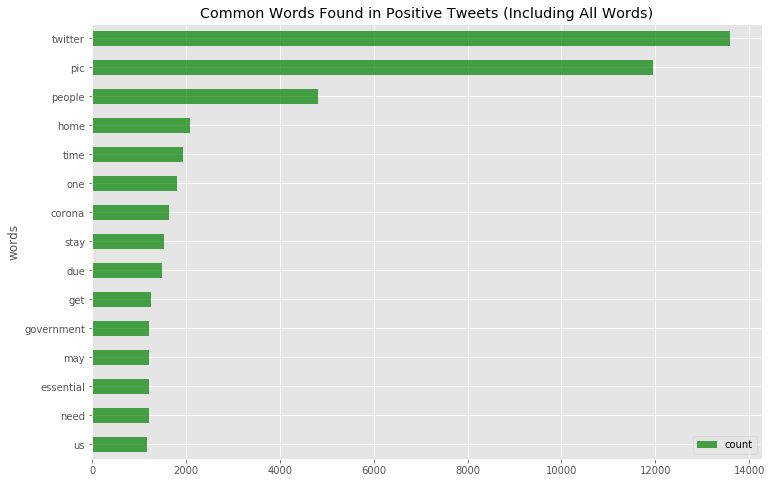

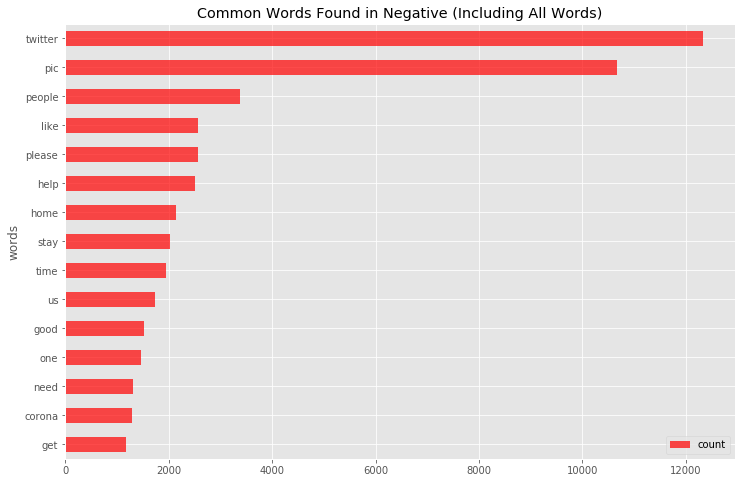

In [ ]:
words_in_neg_tweet = [tweet.lower().split() for tweet in pos_hastags.tweet]
words_in_pos_tweet = [tweet.lower().split() for tweet in neg_hastags.tweet]
words_in_nt_tweet = [tweet.lower().split() for tweet in nt_hastags.tweet]

neg_words_no_urls = list(itertools.chain(*words_in_neg_tweet))
pos_words_no_urls = list(itertools.chain(*words_in_pos_tweet))
nt_words_no_urls = list(itertools.chain(*words_in_nt_tweet))

counts_no_neg = collections.Counter(neg_words_no_urls)
counts_no_pos = collections.Counter(pos_words_no_urls)
counts_no_nt = collections.Counter(nt_words_no_urls)

clean_tweets_no_pos = pd.DataFrame(counts_no_pos.most_common(15),
                             columns=['words', 'count'])
clean_tweets_no_neg = pd.DataFrame(counts_no_neg.most_common(15),
                             columns=['words', 'count'])
clean_tweets_no_nt = pd.DataFrame(counts_no_nt.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bar graph
clean_tweets_no_pos.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="green", alpha=0.7)
ax.set_title("Common Words Found in Positive Tweets (Including All Words)")
plt.show()
fig, ax = plt.subplots(figsize=(12, 8))
clean_tweets_no_neg.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="red", alpha=0.7)
ax.set_title("Common Words Found in Negative (Including All Words)")
plt.show()
fig, ax = plt.subplots(figsize=(12, 8))
clean_tweets_no_nt.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="grey", alpha=0.7)
ax.set_title("Common Words Found in Neutral Tweets (Including All Words)")
plt.show() 


### 4.7. Weekwise sentiment analysis 

In [ ]:
df = pd.read_csv('sentiment.csv')
df["date"] = pd.to_datetime(df["date"])
df["counter"] = 1;
df["week"] = df['date'].dt.week
df['week'] = df['week']-11

df4 = df[["p_score","week","id"]].groupby(["p_score","week"],as_index = False).count()
p_df = df4[df4["p_score"] == 1 ]
p_df['week'] = "week "+ p_df['week'].astype(str)

n_df = df4[df4["p_score"] == -1]
nn_df = df4[df4["p_score"] == 0]
plt.subplots(1, figsize=(10, 8))
plt.plot(p_df["week"],p_df["id"],color="green")
plt.plot(n_df["week"],n_df["id"],color="red")
plt.plot(nn_df["week"],nn_df["id"],color="blue")
plt.legend(["positive", "negative","neutral"])
plt.title("Sentiment Analysis weekwise starting from March'20")
plt.xlabel("LockDown Weeks")
plt.ylabel("Frequency")
plt.show()

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook



fig, ax = plt.subplots(1, figsize=(10, 8))

ax.scatter(p_df["week"],p_df["id"],color="green" , s=p_df["id"], alpha=0.5)
ax.scatter(n_df["week"],n_df["id"], color="red" ,s=n_df["id"],  alpha=0.5)
ax.scatter(nn_df["week"],nn_df["id"], color="grey",  s=nn_df["id"], alpha=0.5)

ax.set_xlabel('Weeks', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Sentiment change weekwise')

ax.grid(True)
fig.tight_layout()

plt.show()

### 4.8. Monthwise sentiment analysis

In [ ]:
#load data
df = pd.read_csv('sentiment.csv')
df['datenew']=df['date']
df["datenew"] = pd.to_datetime(df["datenew"]).dt.strftime("%Y-%m-%d")
df = df.sort_values(by='datenew', ascending=True)
df["month"] = pd.DatetimeIndex(df["datenew"]).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df3 = df[["p_score","month","id"]].groupby(['p_score','month'],as_index=False).count()
positive = df3[df3["p_score"] == 1 ]
negative = df3[df3["p_score"] == -1]
neutral = df3[df3["p_score"] == 0]

#line plot
fig = plt.subplots(1, figsize=(10, 8))
plt.plot(['Mar','Apr','May'],positive["id"],color="red")
plt.plot(['Mar','Apr','May'],negative["id"],color="blue")
plt.plot(['Mar','Apr','May'],neutral["id"],color="black")
plt.legend(["positive", "negative","neutral"])
plt.title("Sentiment Analysis monthwise starting from March'20")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()

#scatter plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
fig, ax = plt.subplots(1, figsize=(10,12))
print(positive["month"],len(neutral["id"]))
ax.scatter(['Mar','Apr','May'],positive["id"],color="green" , s=positive["id"], alpha=0.5)
ax.scatter(['Mar','Apr','May'],negative["id"], color="red" ,s=negative["id"],  alpha=0.5)
ax.scatter(['Mar','Apr','May'],neutral["id"], color="grey",  s=neutral["id"], alpha=0.5)

ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Sentiment Count Month-Wise')

ax.grid(True)
fig.tight_layout()
plt.show()



# 5.Conclusion

Sentiment analysis of the tweets determine the polarity and inclination of vast population towards specific topic, item or entity. Sentiment Analysis or Opinion Mining is the computational treatment of opinions, sentiments and subjectivity of text. Sentiment analysis, a branch of digital analytics aims to determine the attitude of a speaker or a writer with respect to some topic or the overall contextual polarity of a document. 

We used the Logistice regression for the sentemental analysis and for prediction of sentiments of the tweets. We achieved the accuracy of 86.16% on first run of the model and the accuracy can be achived upto 97% after third run. After doing analysis we have found that approx 46% tweets sentiments are negative and approx. 43 % are positive and approx. 9% are neutral .So, we can thus conclude that the people are doing negative tweets due to lockdown in India.